# Project Completion
---
### *Disclaimer:*
This code was prepared for educational purposes only. The content presented here is intended to provide additional information to assist investors in making their own investment decisions. Reinforcing, no topic addressed herein constitutes any kind of indication/offering/solicitation of purchase/sale of any product.<br/>
<br/>

---
- First part: select an asset and perform quantitative analysis using its price data

- Second part: using the chosen strategy, perform backtesting and evaluate its performance

- Third part: plug and implement your strategy in MetaTrader5


# Projeto de Conclusão
---
### *Disclaimer:*
Este código foi elaborado para fins exclusivamente educacionais. O conteúdo aqui apresentado visa fornecer informações complementares para auxiliar o investidor na tomada de suas próprias decisões de investimento. Reforçando, nenhum tópico aqui abordado constitui qualquer tipo de indicação/oferta/solicitação de compra/venda de qualquer produto.<br/>
<br/>

---
- Primeira parte: selecionar um ativo e realizar análises quantitativas a partir dos dados de preço do mesmo

- Segunda parte: a partir da estratégia escolhida realizar o backtesting e avaliar seu desempenho

- Terceira parte: plugar e implementar sua estratégia no MetaTrader5

# 1. Installing and importing Libraries
# 1. Instalando e importando Bibliotecas

In [1]:
!pip install backtrader
!pip install MetaTrader5 -- upgrade

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [2]:
# Data analysis and manipulation
# Análise e manipulação de dados

import numpy as np
import pandas as pd
import backtrader as bt

# Time Series Data
# Dados séries temporais

from datetime import datetime
import pytz
import time

# Integration with MetaTrader 5
# Integração com MetaTrader 5

import MetaTrader5 as mt5


In [3]:
# Start the connection to mt5
# Iniciar a conexã com o mt5
mt5.initialize()

True

# 2. Extracting data from MetaTrader5
# 2. Extraindo dados do MetaTrader5

In [3]:
# Select the asset
# Selecionar o ativo

ativo = 'PETR4'

In [4]:
# Select timezone for São Paulo
# Selecionar timezone para São Paulo

timezone = pytz.timezone("America/Sao_Paulo")

In [5]:
# Set start date and end date, in this format
# Definir data inicial e data final, neste formato

data_inicio = datetime(2021,1,1, tzinfo=timezone)
data_fim = datetime(2022,1,1, tzinfo=timezone)

In [23]:
# Create an object called quotes with the parameters active, time frame, start date and end date
# Criar um objeto chamado cotacoes com os parâmetros ativo, time frame, data inicio e data fim

cotacoes = mt5.copy_rates_range(ativo, mt5.TIMEFRAME_D1, data_inicio,data_fim)

In [24]:
cotacoes

array([(1609718400, 23.43, 23.86, 23.33, 23.64, 109323, 1,  74719700),
       (1609804800, 23.63, 24.68, 23.09, 24.56, 107389, 1,  95181100),
       (1609891200, 24.66, 25.27, 24.57, 24.59, 110107, 1,  96562500),
       (1609977600, 24.81, 25.47, 24.81, 25.35,  75579, 1,  56171300),
       (1610064000, 25.73, 25.97, 24.82, 25.45,  82901, 1,  67136300),
       (1610323200, 25.03, 25.4 , 24.86, 25.23,  56067, 1,  52896700),
       (1610409600, 25.45, 25.81, 25.05, 25.05,  78922, 1,  65691900),
       (1610496000, 25.09, 25.23, 23.71, 23.84, 118700, 1,  93826600),
       (1610582400, 23.85, 24.26, 23.48, 24.08,  88268, 1,  50745400),
       (1610668800, 23.75, 23.78, 22.92, 22.99,  95266, 1,  80673300),
       (1610928000, 23.15, 23.59, 22.9 , 22.95,  67042, 1,  68855700),
       (1611014400, 23.29, 23.6 , 22.6 , 23.46,  76733, 1,  61656000),
       (1611100800, 23.67, 23.81, 22.99, 23.07,  69508, 1,  60306200),
       (1611187200, 22.91, 23.22, 22.5 , 22.53,  77581, 1,  41284900),
      

In [25]:
df = pd.DataFrame(cotacoes)
df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,1609718400,23.43,23.86,23.33,23.64,109323,1,74719700
1,1609804800,23.63,24.68,23.09,24.56,107389,1,95181100
2,1609891200,24.66,25.27,24.57,24.59,110107,1,96562500
3,1609977600,24.81,25.47,24.81,25.35,75579,1,56171300
4,1610064000,25.73,25.97,24.82,25.45,82901,1,67136300


In [26]:
# Transform the "time" column to the default date and time format
# Transformar a coluna "time" para o formato de data e hora padrão

df['time']=pd.to_datetime(df['time'], unit='s')
df

# Transform the 'time' column to the dataframe index
# Transformar a coluna 'time' para o índice do dataframe

df.index = df['time']
df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2021-01-04,2021-01-04,23.43,23.86,23.33,23.64,109323,1,74719700
2021-01-05,2021-01-05,23.63,24.68,23.09,24.56,107389,1,95181100
2021-01-06,2021-01-06,24.66,25.27,24.57,24.59,110107,1,96562500
2021-01-07,2021-01-07,24.81,25.47,24.81,25.35,75579,1,56171300
2021-01-08,2021-01-08,25.73,25.97,24.82,25.45,82901,1,67136300


# 3. Quantitative Analysis
# 3. Análise Quantitativa

In [43]:
# Let's analyze the behavior of the stock returns
# Vamos analisar o comportamento dos retornos da ação


retornos = pd.DataFrame(df.close.pct_change())
retornos

,close
time,
2021-01-04,NaN
2021-01-05,0.038917
2021-01-06,0.001221
2021-01-07,0.030907
2021-01-08,0.003945
...,...
2021-12-23,0.006037
2021-12-27,0.014825
2021-12-28,0.001043


<AxesSubplot:xlabel='time'>

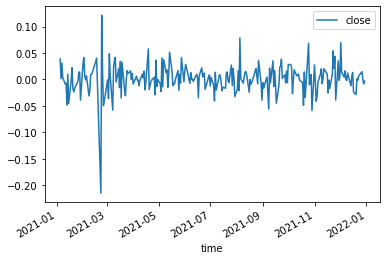

In [45]:
# Visually let's understand the behavior
# Visualmente vamos entender o comportamento


retornos.plot()

<AxesSubplot:xlabel='time'>

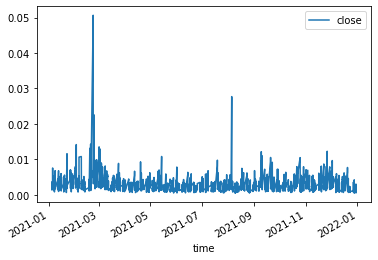

In [12]:
# Let's compute the volatility within a 10-day window and analyze how it behaves graphically
# Vamos realizar o cálculo da volatilidade dentro de uma janela de 10 dias e analisar como ela se comporta graficamente

janelas_vol = retornos.rolling(10).std()
janelas_vol.plot()

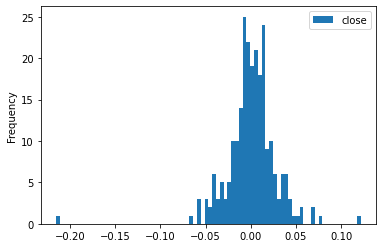

In [46]:
# Now understand how the returns are grouped according to their frequency within the histogram
# Agora entender como estão agrupados os retornos de acordo com a sua frequência dentro do histograma
retornos.plot.hist(bins = 80);

<AxesSubplot:xlabel='time'>

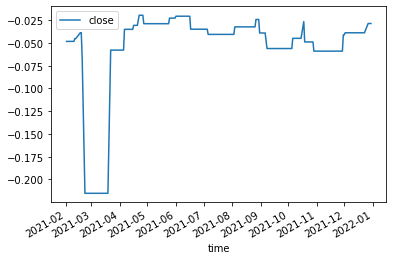

In [47]:
# Observe the largest losses within a 20-day window (approx. one month)
# Observar as maiores perdas dentro de uma janela de 20 dias (aprox um mês)

dd_30 = retornos.rolling(window = 20).min()

dd_30.plot()

# 5. Backtesting

We will develop a swing trade strategy that will buy when price crosses the 100-day moving average upwards, and when it crosses downwards again we will sell.

# 5. Backtesting

Iremos desenvolver uma estratégia de swing trade que irá comprar quando preço cruzar para cima a média móvel de 100 dias e quando cruzar novamente para baixo, iremos vender.

In [48]:
# Check that there is no NaN before entering the actual backtesting
# Verificar se não há nenhum NaN antes de entrar no backtesting de fato

df.isna().sum()

time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64

In [27]:
# Import the data into the backtrader
# Importar os dados para dentro do backtrader

data = bt.feeds.PandasData(dataname=df)

In [49]:
import backtrader.analyzers as btanalyzers

class rsi_media_movel(bt.Strategy):

  def __init__(self):

    self.mm_rapida = bt.indicators.SMA(self.data.close, period=100)
    self.crossup = bt.ind.CrossUp(self.data.close, self.mm_rapida)
    self.crossdown = bt.ind.CrossDown(self.data.close, self.mm_rapida)


  def next(self):
    # if you do not have any open orders - buy condition
    # se não tiver alguma ordem aberta - condição de compra
    if not self.position: 
      if self.crossup == 1:
        self.buy(size=100)
    # if the order is already open - sell condition
    # caso a ordem já estiver aberta - condição de venda
    else: 
      if self.crossdown == 1:
        self.sell(size=100)
        
# define the initial amount of the portfolio
# definimos o montante a inicial do portfólio
caixa_inicial = 30000 

cerebro = bt.Cerebro()
cerebro.addstrategy(rsi_media_movel)
cerebro.adddata(data)

# set the exchange commission
# setamos a comissão da exchange

cerebro.broker.setcommission(commission=0.003)
cerebro.broker.setcash(caixa_inicial)
cerebro.addanalyzer(btanalyzers.PeriodStats, _name='stats', timeframe=bt.TimeFrame.Days)
cerebro.addanalyzer(btanalyzers.DrawDown, _name='drawdown')
thestrats = cerebro.run()
thestrat = thestrats[0]
print('Estatísticas:', thestrat.analyzers.stats.get_analysis())
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
print('Drawdown:', thestrat.analyzers.drawdown.get_analysis())

Estatísticas: OrderedDict([('average', 1.8059043352383855e-05), ('stddev', 0.0010246970518741406), ('positive', 32), ('negative', 30), ('nochange', 185), ('best', 0.006179807202708831), ('worst', -0.005095511533740327)])
Final Portfolio Value: 30130.21
Drawdown: AutoOrderedDict([('len', 9), ('drawdown', 0.4098603272027373), ('moneydown', 124.0), ('max', AutoOrderedDict([('len', 32), ('drawdown', 1.0421008296516048), ('moneydown', 313.5829999999987)]))])


In [39]:
thestrat.analyzers.stats.get_analysis()


OrderedDict([('average', -7.357254120519084e-05),
             ('stddev', 0.0012837908697302827),
             ('positive', 72),
             ('negative', 99),
             ('nochange', 74),
             ('best', 0.006312210890078829),
             ('worst', -0.004600423434542256)])

In [41]:
info = thestrat.analyzers.stats.get_analysis()

In [44]:
estatisticas = info.values()
estatisticas = list(estatisticas)
estatisticas = pd.DataFrame(estatisticas, index=info.keys())
estatisticas

,0
average,-0.000074
stddev,0.001284
positive,72.000000
negative,99.000000
nochange,74.000000
best,0.006312
worst,-0.004600


# 7. Automating the Trade

Here we enter the MetaTrader 5 part, two important observations:

- First that your selected ticker must be present in the "Market Watch" frame in the upper right corner of the Metarade
- Second, if you want to trade on a 1, 5, 10 or 15 minute chart you should go to the top menu -> Tools -> Charts tab -> Select the "Max. bars on chart" option to "Unlimited", this way you will be able to extract and trade on a smaller granular level of time.

# 7.Automatizando o Trade

Aqui entramos na parte do MetaTrader 5, duas observações importantes:

- Primeiro que o seu ticker selecionado deve estar presente no quadro "Observação de Mercado" no canto superior direito do Metarade
- Segundo que caso você queira operar no gráfico de 1, 5, 10 ou 15 minutos você deve ir no menu superior -> Ferramentas -> Na aba Gráficos -> Selecionar a opção 'Máx. barras no gráfico" para "Unlimited", dessa maneira você conseguirá extrair e operar em um nível granular de tempo menor.


In [9]:
# test communication
# testar comunicação

import sys

count_cotacoes = 0

while count_cotacoes < 5:
    ativo = mt5.symbol_info_tick("PETR4")
    print("\r" + str(ativo.last))
    sys.stdout.flush()
    count_cotacoes += 1
    time.sleep(5)

32.61
32.61
32.61
32.61
32.61


In [10]:
ativo.last

32.61

In [36]:
datetime.today()

datetime.datetime(2022, 4, 6, 14, 30, 27, 793195)

In [37]:
# We will generate a real-time dataframe analyzing the daily data of PETR4
# Iremos gerar um dataframe em tempo real analisando os dados diários de PETR4

symbol='PETR4'
cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_D1, data_inicio,datetime.today())



In [50]:
# Transform into a dataframe
# Transformar em um dataframe 

cotacoes_df = pd.DataFrame(cotacoes_ativo)
cotacoes_df['time']=pd.to_datetime(cotacoes_df['time'], unit='s')
cotacoes_df.index = cotacoes_df['time']

## Cálculo Média Móvel de 100 períodos
MM_periodo = 100
MMA = cotacoes_df['close'].rolling(window=MM_periodo).mean()
cotacoes_df['MMA_100p'] = MMA
cotacoes_df.tail(20)

,time,open,high,low,close,tick_volume,spread,real_volume,MMA_100p
time,,,,,,,,,
2022-03-10,2022-03-10,32.60,34.60,32.52,33.70,191305,1,136437700,29.0518
2022-03-11,2022-03-11,33.91,34.38,32.07,32.49,133004,1,92153700,29.1109
2022-03-14,2022-03-14,32.43,32.89,31.52,31.87,94409,1,52126100,29.1645
2022-03-15,2022-03-15,31.14,31.54,30.47,31.10,122231,1,66027700,29.2118
2022-03-16,2022-03-16,31.50,31.54,30.37,30.83,114252,1,71597800,29.2693
2022-03-17,2022-03-17,31.25,31.40,29.50,30.01,199642,1,177812100,29.3150
2022-03-18,2022-03-18,30.09,30.82,29.86,30.61,106922,1,92538600,29.3753
2022-03-21,2022-03-21,30.91,32.09,30.64,31.76,114669,1,67445700,29.4495
2022-03-22,2022-03-22,31.99,32.10,31.35,31.62,110168,1,55950200,29.5056


In [52]:
# Now we will develop the average crossing strategy
# Agora iremos desenvolver a estratégia de cruzamento de média


contador_sinais = 0
posição = 0


while (contador_sinais < 20) and (posição == 0):
    contador_sinais += 1
    print("----------------------------------------")
    print("A hora atual é", datetime.today())
    
    symbol='PETR4'
    cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_D1, data_inicio,datetime.today())
    cotacoes_df = pd.DataFrame(cotacoes_ativo)
    cotacoes_df['time'] = pd.to_datetime(cotacoes_df['time'], unit='s')
    cotacoes_df.index = cotacoes_df['time']
    
    MM_periodo = 100
    MMA = cotacoes_df['close'].rolling(window=MM_periodo).mean()
    cotacoes_df['MMA'] = MMA
    
    qtd = 100.0
    tick_min = mt5.symbol_info(symbol).point
    preco_compra = mt5.symbol_info_tick(symbol).ask
    preco_venda = mt5.symbol_info_tick(symbol).bid
    desvio_toler = 0
    
    ordem_compra = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": qtd,
        "type": mt5.ORDER_TYPE_BUY,
        
        # purchase price, here defined as the asset's ask price (the book's best ask price)
        # preço de compra, aqui definido como ask do ativo (melhor preço de venda do book)
        "price": preco_compra, 
        
        #stop loss (entry price - 100 ticks minimum)
        #stop loss (preço de entrada - 100 ticks mínimos)
        "sl": preco_compra - 100 * tick_min, 
        
        #take profit (entry price + 100 ticks minimum)
        #take profit (preço de entrada + 100 ticks mínimos)
        "tp": preco_compra + 100 * tick_min, 
        "deviation": desvio_toler, 
        "magic": 1, 
        "comment": "Trades estratégia MMA100", 
        "type_time": mt5.ORDER_TIME_DAY, 
        "type_filling": mt5.ORDER_FILLING_RETURN, 
    }
    ordem_venda = {
        #take profit (entry price + 100 ticks minimum)
        # tipo de ordem (a mercado)
        "action": mt5.TRADE_ACTION_DEAL, 
        "symbol": symbol, 
        "volume": qtd, 
        # sell to market
        # venda a mercado
        "type": mt5.ORDER_TYPE_SELL, 
        
        # purchase price, here defined as the asset's ask price (the book's best ask price)
        # preço de compra, aqui definido como ask do ativo (melhor preço de venda do book)
        "price": preco_venda, 
        
        #stop loss (entry price - 100 ticks minimum)
        #stop loss (preço de entrada - 100 ticks mínimos)
        "sl": preco_venda + 100 * tick_min, 
        
        #take profit (entry price + 100 ticks minimum)
        #take profit (preço de entrada + 100 ticks mínimos)
        "tp": preco_venda - 100 * tick_min, 
        "deviation": desvio_toler, 
        "magic": 1, 
        "comment": "Trades estratégia MMA100", 
        "type_time": mt5.ORDER_TIME_DAY,
        "type_filling": mt5.ORDER_FILLING_RETURN, 
    }
    
    print("O preço de fechamento anterior havia sido de",cotacoes_df.close[-2],"e a MM_100p estava em",cotacoes_df.MMA[-2])
    print("O preço de fechamento atual está em",cotacoes_df.close[-1],"e a MM_100p está em",cotacoes_df.MMA[-1])
    
    if (cotacoes_df.close[-1] > cotacoes_df.MMA[-1]) and (cotacoes_df.close[-2] < cotacoes_df.MMA[-2]):
        print("Sinal de entrada: COMPRA")
        mt5.order_send(ordem_compra)
        print("COMPRA executada com sucesso!")
        print("A ordem OCO do Stoploss está no preço:",(preco_compra - 100 * tick_min))
        print("A ordem OCO do Take Profit está no preço:",(preco_compra + 100 * tick_min))
        posição = 1
        time.sleep(15)
        
    elif (cotacoes_df.close[-1] < cotacoes_df.MMA[-1]) and (cotacoes_df.close[-2] > cotacoes_df.MMA[-2]):
        print("Sinal de entrada: VENDA")
        mt5.order_send(ordem_venda)
        print("VENDA executada com sucesso!")
        print("A ordem OCO do Stoploss está no preço:",(preco_venda + 100 * tick_min))
        print("A ordem OCO do Take Profit está no preço:",((preco_venda - 100 * tick_min)))
        posição = -1
        time.sleep(15)
        
    else:
        print("Nada a fazer nesse momento. Aguarde a próxima extração em 15 seg")
        time.sleep(15)
    

----------------------------------------
A hora atual é 2022-04-07 15:22:47.243033
O preço de fechamento anterior havia sido de 32.36 e a MM_100p estava em 30.399
O preço de fechamento atual está em 33.56 e a MM_100p está em 30.4977
Nada a fazer nesse momento. Aguarde a próxima extração em 15 seg
----------------------------------------
A hora atual é 2022-04-07 15:23:02.319477
O preço de fechamento anterior havia sido de 32.36 e a MM_100p estava em 30.399
O preço de fechamento atual está em 33.56 e a MM_100p está em 30.4977
Nada a fazer nesse momento. Aguarde a próxima extração em 15 seg
----------------------------------------
A hora atual é 2022-04-07 15:23:17.331218
O preço de fechamento anterior havia sido de 32.36 e a MM_100p estava em 30.399
O preço de fechamento atual está em 33.53 e a MM_100p está em 30.4974
Nada a fazer nesse momento. Aguarde a próxima extração em 15 seg
----------------------------------------
A hora atual é 2022-04-07 15:23:32.346031
O preço de fechamento a

KeyboardInterrupt: 